In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_hdf('results/class_exp_res_03_51_11.h5')

In [10]:
df.columns

Index([u't_len', u'dims', u'n_classes', u'approach', u'accuracy', u'ad_mean',
       u'ad_std', u'gd_mean', u'gd_std', u'conf_mean', u'conf_std'],
      dtype='object')

In [11]:
df["approach"].unique()

array(['RC', 'SVM', 'vRNN'], dtype=object)

In [12]:
rc_res = df[df["approach"] == "RC"]
svm_res = df[df["approach"] == "SVM"]
van_res = df[df["approach"] == "vRNN"]

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


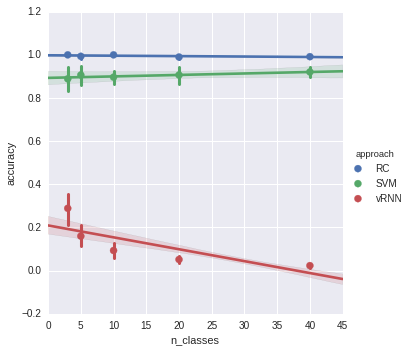

In [6]:
ff = sns.lmplot("n_classes", "accuracy", hue="approach", data=df, x_estimator=np.mean)

In [95]:
import itertools

exp_iter = 10
class_nums = [3, 5, 10, 20, 40]
class_type_list = ["cont_spec", "orth_spec", "disc_spec"]
approaches = df["approach"].unique()

In [20]:
all_dat = np.load("results/class_exp_res_03_51_09.npz")

In [94]:
df["approach"].unique()

array(['RC', 'SVM', 'vRNN'], dtype=object)

In [22]:
rcr = all_dat['rc_res']

In [32]:
af = rcr.item()

In [121]:
for app, nc in itertools.product(approaches, class_nums):
    idx = df.loc[(df["approach"] == app) & (df["n_classes"] == nc)][:10].index
    df.loc[idx, "Signal Type"] = "cont"
    idx = df.loc[(df["approach"] == app) & (df["n_classes"] == nc)][10:20].index
    df.loc[idx, "Signal Type"] = "orth"
    idx = df.loc[(df["approach"] == app) & (df["n_classes"] == nc)][20:30].index
    df.loc[idx, "Signal Type"] = "disc"

In [122]:
df["Signal Type"].unique()

array(['cont', 'orth', 'disc'], dtype=object)

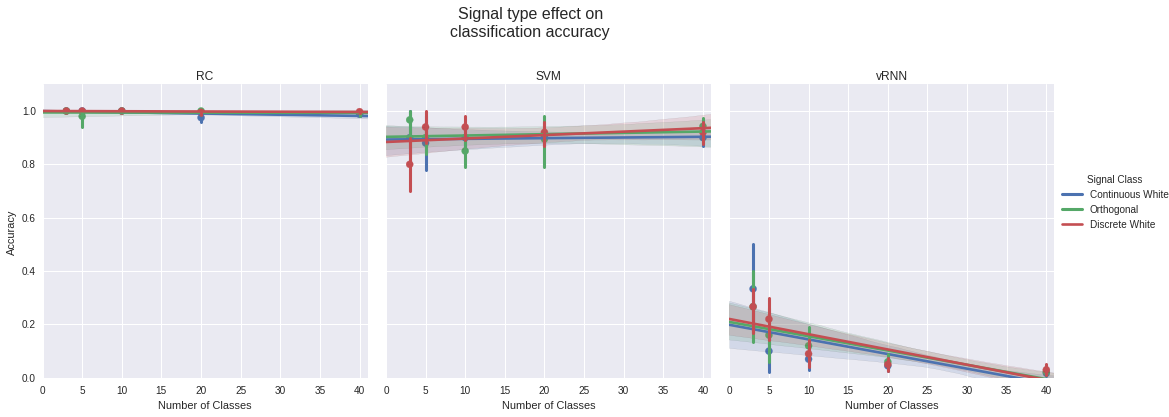

In [133]:
ff = sns.lmplot("n_classes", "accuracy", hue="Signal Type", col="approach", data=df, x_estimator=np.mean, legend=False)

title_list = ["RC", "SVM", "vRNN"]

for a_i, ax in enumerate(ff.axes[0]):
    ax.set_ylim((0.0, 1.1))
    ax.set_xlim((0, 41))
    ax.set_title(title_list[a_i])
    
ax1 = ff.axes[0, 0]

ll = len(ax1.lines)

ff.fig.legend((ax1.lines[0], ax1.lines[ll/2], ax1.lines[-1]),
              ("Continuous White", "Orthogonal", "Discrete White"), title="Signal Class", bbox_to_anchor=(1.09, 0.7))

ff.set_axis_labels(x_var="Number of Classes", y_var="Accuracy")
ff.fig.suptitle("Signal type effect on\nclassification accuracy", fontsize=16, y=1.15)
ff.fig.savefig("signal_class.pdf", format="pdf", bbox_inches='tight')